<a href="https://colab.research.google.com/github/kkyung0131/Euron-6th-Project/blob/%EC%A1%B0%EC%8A%B9%EC%97%B0/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ + Í∏∞ÌÉÄ Ï†ÑÏ≤òÎ¶¨

In [1]:
!pip install konlpy

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.4/19.4 MB 25.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 488.6/488.6 kB 20.8 MB/s eta 0:00:00


In [75]:
from google.colab import drive
drive.mount('/content/gdrive/')


file_path =  "/content/gdrive/My Drive/EuronData/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


from konlpy.tag import Okt, Komoran, Hannanum, Kkma, Mecab
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import re

In [4]:
import pandas as pd

df = pd.read_csv(file_path + "preprocessed_review_data.csv")
df.head()

category                                            reviews  keyword1  \
0    Ìï¥ÏÇ∞Î¨ºÏöîÎ¶¨  ÎÖ∏Ìè¨ÏãùÎãπÏöîÏ¶ò Ïù∏Í∏∞ÏûàÎäîÍ≥≥Ïù¥ÎûòÏÑú ÏôîÏñ¥Ïöî Ï£ºÍæ∏ÎØ∏ ÏÇºÍ≤π ÍΩÉÍ≤åÏÉàÏö∞ÏÇ¨Î¶¨Ï∂îÍ∞ÄÌï¥ÏÑúÎ®πÏóàÎäîÎç∞Ïöî ÏñëÎÖêÎßõ...  ÏùåÏãùÏù¥ ÎßõÏûàÏñ¥Ïöî   
1     Í≥†Í∏∞ÏöîÎ¶¨  ÏßÄÎÇòÍ∞ÄÎäîÎç∞ ÎÑàÎ¨¥ ÏòàÎªêÏÑú Ïà†ÏßëÏù∏ Ï§Ñ ÏïåÏïòÎäîÎç∞ ÏïåÍ≥† Î≥¥ÎãàÍπå Ïã†Ï¥å ÏÇºÍ≤πÏÇ¥ ÎßõÏßëÏù¥ÎçîÎùºÍµ¨Ïöî ...  ÏùåÏãùÏù¥ ÎßõÏûàÏñ¥Ïöî   
2      Ï§ëÏãùÎãπ  ÌòëÎ†•ÏÇ¨Îì§Í≥º ÌöåÏùò ÎÅùÎÇ¥Í≥† Ïò§Ï∞¨ Í∞ôÏù¥ÌñàÎÑ§Ïöî Í∞ÑÎßåÏóê Ïò§Îãà ÏÉàÎ°úÏö¥ Î©îÎâ¥ÎèÑ ÏÉùÍ∏∞Í≥† ÏÇ¨ÎûåÏù¥ Îßé...  ÏùåÏãùÏù¥ ÎßõÏûàÏñ¥Ïöî   
3     Í≥†Í∏∞ÏöîÎ¶¨  Ïù¥ Î¶¨Î∑∞Îäî ÏóÖÏ≤¥Î°úÎ∂ÄÌÑ∞ Î¨¥Î£å Ïù¥Ïö©Í∂åÏùÑ Ï†úÍ≥µ Î∞õÏùÄ ÎåÄÍ∞ÄÎ°ú ÏûëÏÑ±Ìïú ÏÜîÏßÅ ÌõÑÍ∏∞ÏûÖÎãàÎã§  Ïö∞Ïó∞...  ÏùåÏãùÏù¥ ÎßõÏûàÏñ¥Ïöî   
4       ÌïúÏãù  ÏÉùÎ∞©ÏÜ°Ìà¨Îç∞Ïù¥ÏôÄ ÎßõÏùò ÏäπÎ∂ÄÏÇ¨ÏóêÎèÑ Î∞©ÏòÅÎê† Ï†ïÎèÑÎ°ú Í≤ÄÏ¶ùÎêú Ïú†Î™ÖÌïú Ìï´ÌîåÎß§Ïû•Ïù¥ÎçîÎùºÍµ¨Ïöî ÌÖåÎùºÏä§...  ÏùåÏãùÏù¥ ÎßõÏûàÏñ¥Ïöî   

    keyword2     keyword3  
0       ÏπúÏ†àÌï¥Ïöî    Ïù∏ÌÖåÎ¶¨Ïñ¥Í∞Ä Î©ãÏ†∏Ïöî  
1  Í≥†Í∏∞ ÏßàÏù¥ Ï¢ãÏïÑÏöî         ÏπúÏ†àÌï¥Ïöî  
2  Ïù∏ÌÖåÎ¶¨Ïñ¥Í∞Ä Î©ãÏ†∏Ïöî  ÌäπÎ≥ÑÌïú Î©îÎâ¥Í∞Ä ÏûàÏñ¥Ïöî  
3     ÏñëÏù¥ ÎßéÏïÑÏöî         ÏπúÏ†àÌï¥Ïöî  
4     ÏñëÏù¥ ÎßéÏïÑÏöî     Ïû¨Î£åÍ∞Ä Ïã†ÏÑ†Ìï¥Ïöî

In [5]:
#ÏõêÌï´ Ïù∏ÏΩîÎî©
le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])

#ÎùºÎ≤® Ïù∏ÏΩîÎî©
le = LabelEncoder()
df['keyword1'] = le.fit_transform(df['keyword1'])
le = LabelEncoder()
df['keyword2'] = le.fit_transform(df['keyword2'])
le = LabelEncoder()
df['keyword3'] = le.fit_transform(df['keyword3'])

In [6]:
#stopwords ÏßÄÏ†ï
#ÏùºÎã® Ïù∏ÌÑ∞ÎÑ∑Ïóê ÏûàÎäîÍ±∞ ÌïòÎÇò Ïì∞Í∏¥ ÌñàÎäîÎç∞ Ïò§ÌûàÎ†§ ÎÑàÎ¨¥ ÎßéÏù¥ Î∂àÏö©Ïñ¥Î°ú Ï≤òÎ¶¨ÌïòÎäîÍ±∞ ÏïÑÎãåÍ∞Ä Ïã∂Í∏∞ÎèÑ ÌïòÎÑ§Ïöî
#Ï∂úÏ≤ò: https://ahnsun98.tistory.com/35#google_vignette
#ÏòàÎ•º Îì§Ïñ¥ÏÑú ~ÏïäÎã§ ÎùºÍ≥† ÌïòÎ©¥ Î∂ÄÏ†ïÏùò ÏùòÎØ∏ÎãàÍπå Ïò§ÌûàÎ†§ ÌïÑÏöîÌïú Í≤å ÏïÑÎãåÏßÄ... Í∑∏Îü∞ ÏπúÍµ¨Îì§ÎïåÎ¨∏Ïóê Í≥†ÎØºÎê©ÎãàÎã§.
f = open(file_path + 'stopword.txt', "r")
stopwords = f.read().splitlines()

In [7]:
df['reviews'][0]

'ÎÖ∏Ìè¨ÏãùÎãπÏöîÏ¶ò Ïù∏Í∏∞ÏûàÎäîÍ≥≥Ïù¥ÎûòÏÑú ÏôîÏñ¥Ïöî Ï£ºÍæ∏ÎØ∏ ÏÇºÍ≤π ÍΩÉÍ≤åÏÉàÏö∞ÏÇ¨Î¶¨Ï∂îÍ∞ÄÌï¥ÏÑúÎ®πÏóàÎäîÎç∞Ïöî ÏñëÎÖêÎßõÏù¥ÍπäÏù¥Í∞ÄÏûàÏñ¥ÏÑú Î≥∂ÏùåÎ∞•ÍπåÏßÄÎÑàÎ¨¥ÎßõÎÇòÎÑ§ÏöîÌêÅÎìÄÏπòÏ¶àÏóêÏ∞çÏñ¥Î®πÏóàÎäîÎç∞ Ï≤úÏÉÅÏùòÎßõÏù¥ÎÑ§Ïöî ÏñëÎèÑÌë∏ÏßêÌï¥ÏÑúÎÇ®ÏùÄÍ≤ÉÎì§ÎèÑ Îî∞Î°úÌè¨Ïû•Ìï¥ÏÑú ÏÇ¨Ïû•ÎãòÏù¥Ï±ôÍ≤®Ï£ºÏÖ®ÎäîÎç∞Ïöî ÏßÑÏßú ÎßõÎÇúÍ±∞Î®πÏù¥Í≥†Ìîà ÏóÑÎßàÎßàÏùåÎäêÍºàÎÑ§Ïö© Í∞êÏÇ¨ÎìúÎ†§Ïöî Ï≠àÍæ∏ÎØ∏Í∞Ä ÎÑàÎ¨¥ Î®πÍ≥†Ïã∂Ïñ¥ÏÑú Ïò® Ïã†Ï¥å Ïó≠Ïãú Í∏∞ÎåÄÎ•º Ï†ÄÎ≤ÑÎ¶¨ÏßÄ ÏïäÍ≥† ÌïµÏ°¥Îßõ ÏûÖÎãàÎã§ Ï†êÏã¨ÌäπÏÑ†ÏúºÎ°ú Î®πÏóàÎäîÎç∞ Í∞ÄÍ≤© Ï∞©ÌïòÍ≥† Ï≠àÍæ∏ÎØ∏ Ï¢ãÏïÑÌïòÎäî Ïö∞Î¶¨ Ïó¨ÏπúÎäêÎãòÍªòÏöî ÎåÄÎßåÏ°±ÏùÑ ÌïòÏÖ®ÏäµÎãàÎã§ ÎòêÌïú Î≥∂ÏùåÎ∞• ÌïòÌä∏Î°ú Ìï¥Ï£ºÏãúÎäîÎç∞ ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Ï¢ãÏïÑÏöî Ïà†ÎèÑ ÏãºÎç∞ Ï†êÏã¨Ïù¥Îùº Ìå®Ïä§ ÏßÑÏßú Ï¢ãÏïÑÏöî„Öã„Öã Îã§ÏùåÏóê ÎòêÏò¨ÍªòÏöî ÏßëÍ∑ºÏ≤úÎç∞ Ï≤òÏùåÍ∞ÄÎ¥Ñ Ï≠àÏÇº Í∏∞Î≥∏ÏÖãÌåÖ ÌôçÌï© ÏΩòÏπòÏ¶à Í≥ÑÎûÄÍπåÏßÄ ÏïåÏ∞®Í≤å ÎßõÏûàÏñ¥Ïöî Ï≠àÍæ∏ÎØ∏ÏÇºÍ≤π Î®πÏóàÎäîÎç∞ Î¨¥ÎÇúÎ¨¥ÎÇú ÎßõÏûàÏñ¥Ïöî Î≥∂ÏùåÎ∞•Ïù¥ Î≥ÑÎØ∏ÏûÖÎãàÎã§„Öé Í≥ÑÎûÄÏ∞úÎëê Î≥¥Îì§Í±∞Î†§ÏÑú ÎßõÏûàÍ≤å

In [10]:
def clean_text(text):
    # ÏûêÏùå/Î™®ÏùåÎßå ÏûàÎäî Ìå®ÌÑ¥ Ï†úÍ±∞
    text = re.sub(r'[„Ñ±-„Öé„Öè-„Ö£]+', '', text)
    # ÌäπÏàòÍ∏∞Ìò∏ Ï†úÍ±∞ (ÌïúÍ∏Ä, ÏòÅÏñ¥, Ïà´ÏûêÎ•º Ï†úÏô∏Ìïú Î™®Îì† Î¨∏Ïûê Ï†úÍ±∞)
    text = re.sub(r'[^Í∞Ä-Ìû£a-zA-Z0-9\s]', '', text)
    # Ïó∞ÏÜçÎêú Í≥µÎ∞±ÏùÑ ÌïòÎÇòÏùò Í≥µÎ∞±ÏúºÎ°ú
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['reviews'] = df['reviews'].apply(clean_text)

In [11]:
df['reviews'][0]

'ÎÖ∏Ìè¨ÏãùÎãπÏöîÏ¶ò Ïù∏Í∏∞ÏûàÎäîÍ≥≥Ïù¥ÎûòÏÑú ÏôîÏñ¥Ïöî Ï£ºÍæ∏ÎØ∏ ÏÇºÍ≤π ÍΩÉÍ≤åÏÉàÏö∞ÏÇ¨Î¶¨Ï∂îÍ∞ÄÌï¥ÏÑúÎ®πÏóàÎäîÎç∞Ïöî ÏñëÎÖêÎßõÏù¥ÍπäÏù¥Í∞ÄÏûàÏñ¥ÏÑú Î≥∂ÏùåÎ∞•ÍπåÏßÄÎÑàÎ¨¥ÎßõÎÇòÎÑ§ÏöîÌêÅÎìÄÏπòÏ¶àÏóêÏ∞çÏñ¥Î®πÏóàÎäîÎç∞ Ï≤úÏÉÅÏùòÎßõÏù¥ÎÑ§Ïöî ÏñëÎèÑÌë∏ÏßêÌï¥ÏÑúÎÇ®ÏùÄÍ≤ÉÎì§ÎèÑ Îî∞Î°úÌè¨Ïû•Ìï¥ÏÑú ÏÇ¨Ïû•ÎãòÏù¥Ï±ôÍ≤®Ï£ºÏÖ®ÎäîÎç∞Ïöî ÏßÑÏßú ÎßõÎÇúÍ±∞Î®πÏù¥Í≥†Ìîà ÏóÑÎßàÎßàÏùåÎäêÍºàÎÑ§Ïö© Í∞êÏÇ¨ÎìúÎ†§Ïöî Ï≠àÍæ∏ÎØ∏Í∞Ä ÎÑàÎ¨¥ Î®πÍ≥†Ïã∂Ïñ¥ÏÑú Ïò® Ïã†Ï¥å Ïó≠Ïãú Í∏∞ÎåÄÎ•º Ï†ÄÎ≤ÑÎ¶¨ÏßÄ ÏïäÍ≥† ÌïµÏ°¥Îßõ ÏûÖÎãàÎã§ Ï†êÏã¨ÌäπÏÑ†ÏúºÎ°ú Î®πÏóàÎäîÎç∞ Í∞ÄÍ≤© Ï∞©ÌïòÍ≥† Ï≠àÍæ∏ÎØ∏ Ï¢ãÏïÑÌïòÎäî Ïö∞Î¶¨ Ïó¨ÏπúÎäêÎãòÍªòÏöî ÎåÄÎßåÏ°±ÏùÑ ÌïòÏÖ®ÏäµÎãàÎã§ ÎòêÌïú Î≥∂ÏùåÎ∞• ÌïòÌä∏Î°ú Ìï¥Ï£ºÏãúÎäîÎç∞ ÎÑàÎ¨¥ ÎßõÏûàÍ≥† Ï¢ãÏïÑÏöî Ïà†ÎèÑ ÏãºÎç∞ Ï†êÏã¨Ïù¥Îùº Ìå®Ïä§ ÏßÑÏßú Ï¢ãÏïÑÏöî Îã§ÏùåÏóê ÎòêÏò¨ÍªòÏöî ÏßëÍ∑ºÏ≤úÎç∞ Ï≤òÏùåÍ∞ÄÎ¥Ñ Ï≠àÏÇº Í∏∞Î≥∏ÏÖãÌåÖ ÌôçÌï© ÏΩòÏπòÏ¶à Í≥ÑÎûÄÍπåÏßÄ ÏïåÏ∞®Í≤å ÎßõÏûàÏñ¥Ïöî Ï≠àÍæ∏ÎØ∏ÏÇºÍ≤π Î®πÏóàÎäîÎç∞ Î¨¥ÎÇúÎ¨¥ÎÇú ÎßõÏûàÏñ¥Ïöî Î≥∂ÏùåÎ∞•Ïù¥ Î≥ÑÎØ∏ÏûÖÎãàÎã§ Í≥ÑÎûÄÏ∞úÎëê Î≥¥Îì§Í±∞Î†§ÏÑú ÎßõÏûàÍ≤å Î®πÎ†ÄÎç

tag ÏßÄÏ†ï ÏúÑÌï¥ÏÑú Í∞ÄÏû• Ï≤´Î≤àÏß∏ Î¶¨Î∑∞Îßå Í∞ÄÏ†∏Îã§Í∞Ä ÌÜ†ÌÅ∞Ìôî Í≤∞Í≥º ÏÇ¥Ìé¥Î¥§ÏäµÎãàÎã§!

In [15]:
#Okt, Komoran, Hannanum, Kkma, Mecab
okt = Okt()
komoran = Komoran()
hannanum = Hannanum()
kkma = Kkma()

print("Result of Twitter", okt.morphs(df['reviews'][0], stem=True))
print("Result of Komoran", komoran.morphs(df['reviews'][0]))
print("Result of Hannanum", hannanum.morphs(df['reviews'][0]))
print("Result of Kkma", kkma.morphs(df['reviews'][0]))

Result of Twitter ['ÎÖ∏Ìè¨', 'ÏãùÎãπ', 'ÏöîÏ¶ò', 'Ïù∏Í∏∞', 'ÏûàÎã§', 'Í≥≥', 'Ïù¥ÎûòÏÑú', 'Ïò§Îã§', 'Ï£ºÍæ∏ÎØ∏', 'ÏÇºÍ≤π', 'ÍΩÉÍ≤å', 'ÏÉàÏö∞', 'ÏÇ¨Î¶¨', 'Ï∂îÍ∞Ä', 'ÌïòÎã§', 'Î®πÎã§', 'ÏñëÎÖê', 'Îßõ', 'Ïù¥', 'ÍπäÎã§', 'Î≥∂ÏùåÎ∞•', 'ÍπåÏßÄ', 'ÎÑàÎ¨¥', 'Îßõ', 'ÎÇò', 'ÎÑ§', 'Ïöî', 'ÌêÅÎìÄ', 'ÏπòÏ¶à', 'Ïóê', 'Ï∞çÎã§', 'Î®πÎã§', 'Ï≤ú', 'ÏÉÅÏùò', 'Îßõ', 'Ïù¥ÎÑ§', 'Ïöî', 'ÏñëÎèÑ', 'Ìë∏Îã§', 'ÏßÄÎã§', 'ÏÑúÎÇ®', 'ÏùÄ', 'Í≤É', 'Îì§', 'ÎèÑ', 'Îî∞Î°ú', 'Ìè¨Ïû•', 'ÌïòÎã§', 'ÏÇ¨Ïû•', 'Îãò', 'Ïù¥', 'Ï±ôÍ∏∞Îã§', 'ÏßÑÏßú', 'Îßõ', 'ÎÇú', 'Í±∞', 'Î®πÏù¥', 'Í≥†ÌîÑÎã§', 'ÏóÑÎßà', 'ÎßàÏùå', 'ÎäêÎÅºÎã§', 'ÎÑ§', 'Ïö©', 'Í∞êÏÇ¨', 'ÎìúÎ¶¨Îã§', 'Ï≠àÍæ∏ÎØ∏', 'Í∞Ä', 'ÎÑàÎ¨¥', 'Î®πÎã§', 'Ïò®', 'Ïã†Ï¥å', 'Ïó≠Ïãú', 'Í∏∞ÎåÄ', 'Î•º', 'Ï†Ä', 'Î≤ÑÎ¶¨Îã§', 'ÏïäÎã§', 'ÌïµÏ°¥Îßõ', 'Ïù¥Îã§', 'Ï†êÏã¨', 'ÌäπÏÑ†', 'ÏúºÎ°ú', 'Î®πÎã§', 'Í∞ÄÍ≤©', 'Ï∞©ÌïòÎã§', 'Ï≠àÍæ∏ÎØ∏', 'Ï¢ãÏïÑÌïòÎã§', 'Ïö∞Î¶¨', 'Ïó¨Ïπú', 'ÎäêÎãò', 'Íªò', 'Ïöî', 'ÎåÄ', 'ÎßåÏ°±', 'ÏùÑ', 'ÌïòÎã§', 'ÎòêÌïú', 'Î≥∂ÏùåÎ∞•', 'ÌïòÌä∏', 'Î°ú', 'Ìï¥Ï£ºÎã§', 'ÎÑàÎ¨¥', 'ÎßõÏû

Í≤∞Í≥ºÏ†ÅÏúºÎ°ú OktÍ∞Ä Í∞ÄÏû• ÏûòÎêú Í≤É Í∞ôÏïÑÏÑú Okt ÏÇ¨Ïö©  

HannanumÏùò Í≤ΩÏö∞ ÎùÑÏñ¥Ïì∞Í∏∞Í∞Ä ÏóÜÏúºÎ©¥ Ïûò ÏûëÎèôÌïòÏßÄ ÏïäÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ  
KomoranÎèÑ ÏúÑÏôÄ ÎπÑÏä∑..

In [17]:
from collections import Counter
import operator

all_reviews = ' '.join(df['reviews'])

tokens = okt.morphs(all_reviews, stem = True)

stopword_counts = Counter(token for token in tokens if token in stopwords)
print(stopword_counts)

Counter({'ÌïòÎã§': 5623, 'Ïù¥': 5283, 'Ïóê': 3970, 'Í∞Ä': 3082, 'ÏûàÎã§': 2587, 'Ïù¥Îã§': 1502, 'ÏùÑ': 1223, 'Í∞ôÎã§': 1208, 'Î°ú': 1160, 'ÏúºÎ°ú': 1120, 'Îì§': 1104, 'Î•º': 1032, 'Ïùò': 921, 'ÏóêÏÑú': 842, 'Í≤É': 827, 'ÏïäÎã§': 756, 'Í≥º': 701, 'Îòê': 664, 'ÎêòÎã§': 645, 'Îïå': 635, 'ÏôÄ': 589, 'ÏãúÌÇ§Îã§': 550, 'ÍπåÏßÄ': 529, 'ÎÇò': 472, 'Ïó¨Í∏∞': 433, 'Îã§Ïùå': 424, 'Îã§Î•∏': 404, 'Ï†ú': 398, 'Ï†Ä': 371, 'ÌïòÎÇò': 345, 'Í∞ôÏù¥': 333, 'ÏãúÍ∞Ñ': 326, 'Í∑∏Î¶¨Í≥†': 316, 'Í∑∏': 298, 'Ï¢Ä': 289, 'ÎêòÏñ¥Îã§': 278, 'Î∂ÄÌÑ∞': 229, 'Ï°∞Í∏à': 212, 'Î∞îÎ°ú': 207, 'Îî±': 204, 'Ìïò': 188, 'Ìï®Íªò': 162, 'Ïò§': 158, 'Î™®Îëê': 156, 'Íµ¨': 151, 'ÏïÑ': 145, 'Ïùº': 143, 'ÎÑ§': 142, 'Ïù¥Î†áÎã§': 139, 'ÌòºÏûê': 128, 'Ïù¥Î≤à': 112, 'Îì±': 109, 'ÏïÑÏù¥': 109, 'Î¨¥Ïóá': 105, 'Ïó¨': 100, 'Ïôú': 91, 'ÏùºÎã®': 90, 'ÎÜÄÎùºÎã§': 88, 'Ï†ÄÌù¨': 86, 'Î™®': 82, 'ÏïΩÍ∞Ñ': 81, 'Í∑∏ÎûòÎèÑ': 79, 'Ïù¥ÏÉÅ': 78, 'Í±∞Ïùò': 78, 'Ïïº': 72, 'Îëò': 68, 'Îã§Îßå': 66, 'Ïñ¥ÎñªÎã§': 64, 'Î™á': 62, 'ÏóêÍ≤å': 61, 'ÏßÄÎßå': 59, 'ÎÑà'

In [27]:
print(len(stopwords))
print(list(stopword_counts.most_common())[:100])

684
[('ÌïòÎã§', 5623), ('Ïù¥', 5283), ('Ïóê', 3970), ('Í∞Ä', 3082), ('ÏûàÎã§', 2587), ('Ïù¥Îã§', 1502), ('ÏùÑ', 1223), ('Í∞ôÎã§', 1208), ('Î°ú', 1160), ('ÏúºÎ°ú', 1120), ('Îì§', 1104), ('Î•º', 1032), ('Ïùò', 921), ('ÏóêÏÑú', 842), ('Í≤É', 827), ('ÏïäÎã§', 756), ('Í≥º', 701), ('Îòê', 664), ('ÎêòÎã§', 645), ('Îïå', 635), ('ÏôÄ', 589), ('ÏãúÌÇ§Îã§', 550), ('ÍπåÏßÄ', 529), ('ÎÇò', 472), ('Ïó¨Í∏∞', 433), ('Îã§Ïùå', 424), ('Îã§Î•∏', 404), ('Ï†ú', 398), ('Ï†Ä', 371), ('ÌïòÎÇò', 345), ('Í∞ôÏù¥', 333), ('ÏãúÍ∞Ñ', 326), ('Í∑∏Î¶¨Í≥†', 316), ('Í∑∏', 298), ('Ï¢Ä', 289), ('ÎêòÏñ¥Îã§', 278), ('Î∂ÄÌÑ∞', 229), ('Ï°∞Í∏à', 212), ('Î∞îÎ°ú', 207), ('Îî±', 204), ('Ìïò', 188), ('Ìï®Íªò', 162), ('Ïò§', 158), ('Î™®Îëê', 156), ('Íµ¨', 151), ('ÏïÑ', 145), ('Ïùº', 143), ('ÎÑ§', 142), ('Ïù¥Î†áÎã§', 139), ('ÌòºÏûê', 128), ('Ïù¥Î≤à', 112), ('Îì±', 109), ('ÏïÑÏù¥', 109), ('Î¨¥Ïóá', 105), ('Ïó¨', 100), ('Ïôú', 91), ('ÏùºÎã®', 90), ('ÎÜÄÎùºÎã§', 88), ('Ï†ÄÌù¨', 86), ('Î™®', 82), ('ÏïΩÍ∞Ñ', 81), ('Í∑∏ÎûòÎèÑ', 79), ('Ïù¥

In [30]:
list(stopword_counts.most_common())[:100]

new_stopwords = []
for tup in list(stopword_counts.most_common())[:100]:
  new_stopwords.append(tup[0])

new_stopwords

['ÌïòÎã§',
 'Ïù¥',
 'Ïóê',
 'Í∞Ä',
 'ÏûàÎã§',
 'Ïù¥Îã§',
 'ÏùÑ',
 'Í∞ôÎã§',
 'Î°ú',
 'ÏúºÎ°ú',
 'Îì§',
 'Î•º',
 'Ïùò',
 'ÏóêÏÑú',
 'Í≤É',
 'ÏïäÎã§',
 'Í≥º',
 'Îòê',
 'ÎêòÎã§',
 'Îïå',
 'ÏôÄ',
 'ÏãúÌÇ§Îã§',
 'ÍπåÏßÄ',
 'ÎÇò',
 'Ïó¨Í∏∞',
 'Îã§Ïùå',
 'Îã§Î•∏',
 'Ï†ú',
 'Ï†Ä',
 'ÌïòÎÇò',
 'Í∞ôÏù¥',
 'ÏãúÍ∞Ñ',
 'Í∑∏Î¶¨Í≥†',
 'Í∑∏',
 'Ï¢Ä',
 'ÎêòÏñ¥Îã§',
 'Î∂ÄÌÑ∞',
 'Ï°∞Í∏à',
 'Î∞îÎ°ú',
 'Îî±',
 'Ìïò',
 'Ìï®Íªò',
 'Ïò§',
 'Î™®Îëê',
 'Íµ¨',
 'ÏïÑ',
 'Ïùº',
 'ÎÑ§',
 'Ïù¥Î†áÎã§',
 'ÌòºÏûê',
 'Ïù¥Î≤à',
 'Îì±',
 'ÏïÑÏù¥',
 'Î¨¥Ïóá',
 'Ïó¨',
 'Ïôú',
 'ÏùºÎã®',
 'ÎÜÄÎùºÎã§',
 'Ï†ÄÌù¨',
 'Î™®',
 'ÏïΩÍ∞Ñ',
 'Í∑∏ÎûòÎèÑ',
 'Ïù¥ÏÉÅ',
 'Í±∞Ïùò',
 'Ïïº',
 'Îëò',
 'Îã§Îßå',
 'Ïñ¥ÎñªÎã§',
 'Î™á',
 'ÏóêÍ≤å',
 'ÏßÄÎßå',
 'ÎÑà',
 'ÏÇ¨',
 'ÌïòÏßÄÎßå',
 'Îß§Î≤à',
 'Îß§Ïùº',
 'Ïñ¥',
 'Ï†ÑÎ∂Ä',
 'Ïù¥ÏßÄÎßå',
 'Ïñ∏Ï†ú',
 'Ïù¥Ïñ¥ÏÑú',
 'Í∑∏ÎûòÏÑú',
 'Ïú°',
 'ÌÉÄÎã§',
 'ÎèôÏïà',
 'Îß§',
 'Ïã¨ÏßÄÏñ¥',
 'Í∞Å',
 'Í∑∏Îü∞Îç∞',
 'Ìõ®Ïî¨',
 'Ïñ¥Îîî',
 'Ïûê',
 'Ïòà',
 'Ïö∞Î¶¨',
 'Î¨ºÎ°†',
 'Ïù¥Îü∞',
 'Ïö∞ÏÑ†',
 'Ïñ¥Îäê',
 'Î

In [32]:
print(len(new_stopwords))

100


Í∏∞Ï°¥ Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏ÏóêÏÑú Í∞ÄÏû• ÏûêÏ£º ÎÇòÏò® Îã®Ïñ¥ 100Í∞úÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÎßåÎì§ÏóàÏäµÎãàÎã§.

In [36]:
#ÌòïÌÉúÏÜå ÎΩëÍ∏∞ + Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ìï®Ïàò
def find_morphs(df):
  #(Okt Ïù¥Ïö©)
  okt = Okt()
  X = []
  for sentence in tqdm(df):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    #stopword Ï†úÍ±∞
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in new_stopwords]
    X.append(stopwords_removed_sentence)

  return X

In [37]:
df['processed_review'] = find_morphs(df['reviews'])

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 670/670 [02:17<00:00,  4.88it/s]


ÌÖçÏä§Ìä∏Í∞Ä Í∑∏Î†áÍ≤å ÌÅ∞ Ìé∏Ïù¥ ÏïÑÎãàÎùºÏÑú 1Î≤àÎßå ÎÇòÏò® Îã®Ïñ¥Îì§Îßå Ï†úÍ±∞ÌñàÏäµÎãàÎã§!

In [ ]:
for sentence in df.iloc[0:5, 1]:
  print(sentence)

In [ ]:
df['processed_review'][0]

['ÎÖ∏Ìè¨',
 'ÏãùÎãπ',
 'ÏöîÏ¶ò',
 'Ïù∏Í∏∞',
 'ÏûàÎäî',
 'Í≥≥',
 'Ïù¥ÎûòÏÑú',
 'ÏôîÏñ¥Ïöî',
 'Ï£ºÍæ∏ÎØ∏',
 'ÏÇºÍ≤π',
 'ÍΩÉÍ≤å',
 'ÏÉàÏö∞',
 'ÏÇ¨Î¶¨',
 'Ï∂îÍ∞Ä',
 'Ìï¥ÏÑú',
 'Î®πÏóàÎäîÎç∞Ïöî',
 'ÏñëÎÖê',
 'Îßõ',
 'ÍπäÏù¥Í∞ÄÏûàÏñ¥ÏÑú',
 'Î≥∂ÏùåÎ∞•',
 'ÎÑàÎ¨¥',
 'Îßõ',
 'Ïöî',
 'ÌêÅÎìÄ',
 'ÏπòÏ¶à',
 'Ï∞çÏñ¥',
 'Î®πÏóàÎäîÎç∞',
 'Ï≤ú',
 'ÏÉÅÏùò',
 'Îßõ',
 'Ïù¥ÎÑ§',
 'Ïöî',
 'ÏñëÎèÑ',
 'Ìë∏',
 'ÏßêÌï¥',
 'ÏÑúÎÇ®',
 'ÏùÄ',
 'ÎèÑ',
 'Îî∞Î°ú',
 'Ìè¨Ïû•',
 'Ìï¥ÏÑú',
 'ÏÇ¨Ïû•',
 'Îãò',
 'Ï±ôÍ≤®Ï£ºÏÖ®ÎäîÎç∞Ïöî',
 'ÏßÑÏßú',
 'Îßõ',
 'ÎÇú',
 'Í±∞',
 'Î®πÏù¥',
 'Í≥†Ìîà',
 'ÏóÑÎßà',
 'ÎßàÏùå',
 'ÎäêÍºà',
 'Ïö©',
 'Í∞êÏÇ¨',
 'ÎìúÎ†§Ïöî',
 'Ï≠àÍæ∏ÎØ∏',
 'ÎÑàÎ¨¥',
 'Î®πÍ≥†Ïã∂Ïñ¥ÏÑú',
 'Ïò®',
 'Ïã†Ï¥å',
 'Ïó≠Ïãú',
 'Í∏∞ÎåÄ',
 'Î≤ÑÎ¶¨ÏßÄ',
 'ÏïäÍ≥†',
 'ÌïµÏ°¥Îßõ',
 'ÏûÖÎãàÎã§',
 'Ï†êÏã¨',
 'ÌäπÏÑ†',
 'Î®πÏóàÎäîÎç∞',
 'Í∞ÄÍ≤©',
 'Ï∞©ÌïòÍ≥†',
 'Ï≠àÍæ∏ÎØ∏',
 'Ï¢ãÏïÑÌïòÎäî',
 'Ïó¨Ïπú',
 'ÎäêÎãò',
 'Íªò',
 'Ïöî',
 'ÎåÄ',
 'ÎßåÏ°±',
 'ÌïòÏÖ®ÏäµÎãàÎã§',
 'Î≥∂ÏùåÎ∞•',
 'ÌïòÌä∏',
 'Ìï¥Ï£ºÏãúÎäîÎç∞',
 'ÎÑàÎ¨¥',
 'Îßõ

# Tokenizer Ï†ÅÏö©

In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['processed_review'])

In [39]:
threshold = 2
total_cnt = len(tokenizer.word_index) # Îã®Ïñ¥Ïùò Ïàò
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

# Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò Ïåç(pair)ÏùÑ keyÏôÄ valueÎ°ú Î∞õÎäîÎã§.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏúºÎ©¥
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ :',total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)

Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ : 10884
Îì±Ïû• ÎπàÎèÑÍ∞Ä 1Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 4541
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 41.721793458287394
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 2.4838910829349405


In [40]:
# 0Î≤à Ìå®Îî© ÌÜ†ÌÅ∞ÏùÑ Í≥†Î†§ÌïòÏó¨ + 1
vocab_size = total_cnt - rare_cnt + 1
print('Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ :',vocab_size)

Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ : 6344


In [41]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(df['processed_review'])
df['review_enc'] = tokenizer.texts_to_sequences(df['processed_review'])

Î¶¨Î∑∞Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : 686
Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 266.08507462686566


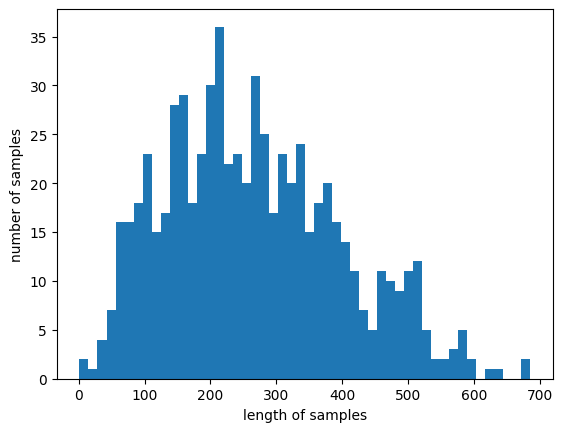

In [42]:
#Î¶¨Î∑∞ Í∏∏Ïù¥ ÌûàÏä§ÌÜ†Í∑∏Îû®
print('Î¶¨Î∑∞Ïùò ÏµúÎåÄ Í∏∏Ïù¥ :',max(len(review) for review in df['review_enc']))
print('Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :',sum(map(len, df['review_enc']))/len(df['review_enc']))
plt.hist([len(review) for review in df['review_enc']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [43]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä %s Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: %s'%(max_len, (count / len(nested_list))*100))

In [44]:
max_len = 700
below_threshold_len(max_len, df['review_enc'])

Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä 700 Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: 100.0


In [45]:
max_len = 600
below_threshold_len(max_len, df['review_enc'])

Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä 600 Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: 99.40298507462687


In [46]:
max_len = 500
below_threshold_len(max_len, df['review_enc'])

Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä 500 Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: 94.17910447761194


max_len = 600ÏúºÎ°ú Ïû°Îäî Í≤å Í∞ÄÏû• Ïù¥ÏÉÅÏ†ÅÏùº Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ!

In [47]:
max_len = 600
padded_sequences = pad_sequences(df['review_enc'], maxlen=max_len)

In [ ]:
#X_train_text, X_test_text, X_train_cat, X_test_cat, y_train, y_test = train_test_split(padded_sequences, df['category_encoded'], df['keyword2'], test_size=0.2, random_state=0)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['keyword2'], test_size = 0.2, random_state = 0)

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(y_test, pred))

0.22388059701492538


In [50]:
from sklearn.metrics import confusion_matrix

<Axes: >

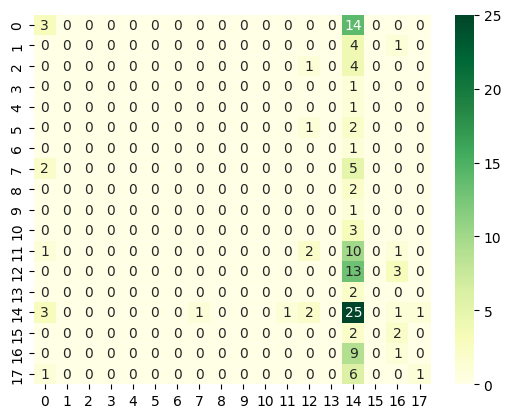

In [53]:
#Ïò§Ï∞® ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_test, pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

Ïó≠ÏãúÎÇò Î∞•Ïù¥ ÎßõÏûàÏñ¥ÏöîÎ°ú ÎßéÏù¥ Îì§Ïñ¥Í∞ÄÎäî Í≤É Í∞ôÎÑ§Ïöî

# TF-IDF Ï†ÅÏö©

TF-IDF Î≤°ÌÑ∞Ìôî, Word2Vec Î≤°ÌÑ∞Ìôî

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [89]:
# TF-IDF ÏÇ¨Ïö©
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  #1Í∞úÏßúÎ¶¨Îûë bigram
    stop_words = new_stopwords,  #Î∂àÏö©Ïñ¥ ÏßÄÏ†ï
    max_df=0.95,  #95% Ïù¥ÏÉÅÏùò Î¨∏ÏÑúÏóê Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ Î¨¥Ïãú
    min_df=2,  #2Í∞ú Ïù¥ÏÉÅÏùò Î¨∏ÏÑúÏóê Îì±Ïû•ÌïòÎäî Îã®Ïñ¥Îßå ÏÇ¨Ïö©
)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['reviews'])

print("TF-IDF Matrix:\n", tfidf_matrix.toarray())


TF-IDF Matrix:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06833829 0.         ... 0.         0.         0.        ]]


Î≤°ÌÑ∞Ìôî Í≤∞Í≥º rfÎ°ú Ï†ïÌôïÎèÑ Ï∏°Ï†ï

In [90]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['keyword2'], test_size = 0.2, random_state = 0)

In [91]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(y_test, pred))

0.2835820895522388


<Axes: >

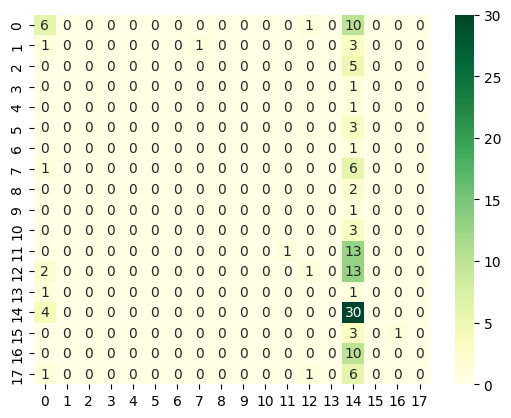

In [92]:
#Ïò§Ï∞® ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_test, pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

# Word2Vec Ï†ÅÏö©

In [67]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [68]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

#ÌÜ†ÌÅ∞Ìôî
tokenized_reviews = [word_tokenize(review) for review in df['reviews']]

#Word2Vec
model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

#Î¶¨Î∑∞ Î≤°ÌÑ∞Ìôî
def get_average_vector(review):
    vectors = [model.wv[word] for word in review if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X = np.array([get_average_vector(review) for review in tokenized_reviews])
X_train, X_test, y_train, y_test = train_test_split(X, df['keyword2'], test_size=0.2, random_state=42)

# RandomForestClassifier Î™®Îç∏ ÌïôÏäµ
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.23880597014925373


<Axes: >

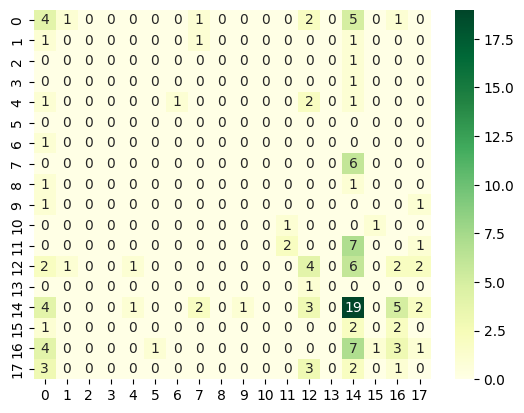

In [69]:
#Ïò§Ï∞® ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

# FastText Ï†ÅÏö©

In [70]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize

#ÌÜ†ÌÅ∞Ìôî
tokenized_reviews = [word_tokenize(review) for review in df['reviews']]

#FastText Î™®Îç∏
model = FastText(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

#Î¶¨Î∑∞ Î≤°ÌÑ∞Ìôî ÏúÑÏùò Word2VecÍ≥º Í∞ôÏù¥ ÏÇ¨Ïö©
def get_average_vector(review):
    vectors = [model.wv[word] for word in review if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X = np.array([get_average_vector(review) for review in tokenized_reviews])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, df['keyword2'], test_size=0.2, random_state=42)

# RandomForestClassifier Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('FastText Accuracy:', accuracy_score(y_test, y_pred))


FastText Accuracy: 0.1791044776119403


<Axes: >

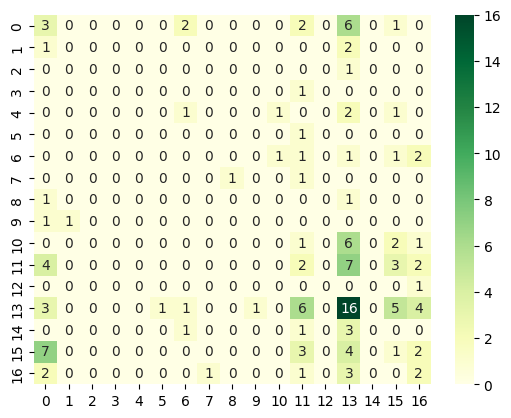

In [71]:
#Ïò§Ï∞® ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

# KoBert Ï†ÅÏö©

In [72]:
import torch
from transformers import BertTokenizer, BertModel

# KoBERT Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
tokenizer = BertTokenizer.from_pretrained('monologg/kobert')
model = BertModel.from_pretrained('monologg/kobert')

# Î¶¨Î∑∞ Î≤°ÌÑ∞Ìôî
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy().squeeze()

X = np.array([get_bert_embedding(review) for review in df['reviews']])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, df['keyword2'], test_size=0.2, random_state=42)

# RandomForestClassifier Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('KoBERT Accuracy:', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/426 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

KoBERT Accuracy: 0.29850746268656714


<Axes: >

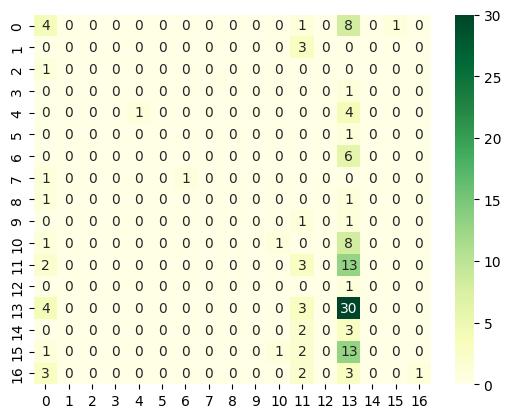

In [73]:
#Ïò§Ï∞® ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

# Data Augmentation

In [76]:
import random
import pickle
import re

wordnet = {}
with open(file_path + "wordnet.pickle", "rb") as f:
	wordnet = pickle.load(f)


# ÌïúÍ∏ÄÎßå ÎÇ®Í∏∞Í≥† ÎÇòÎ®∏ÏßÄÎäî ÏÇ≠Ï†ú
def get_only_hangul(line):
	parseText= re.compile('/ ^[„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£]*$/').sub('',line)

	return parseText



########################################################################
# Synonym replacement
# Replace n words in the sentence with synonyms from wordnet
########################################################################
def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			num_replaced += 1
		if num_replaced >= n:
			break

	if len(new_words) != 0:
		sentence = ' '.join(new_words)
		new_words = sentence.split(" ")

	else:
		new_words = ""

	return new_words


def get_synonyms(word):
	synomyms = []

	try:
		for syn in wordnet[word]:
			for s in syn:
				synomyms.append(s)
	except:
		pass

	return synomyms

########################################################################
# Random deletion
# Randomly delete words from the sentence with probability p
########################################################################
def random_deletion(words, p):
	if len(words) == 1:
		return words

	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################
def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)

	return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0

	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words

	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
	return new_words

########################################################################
# Random insertion
# Randomly insert n words into the sentence
########################################################################
def random_insertion(words, n):
	new_words = words.copy()
	for _ in range(n):
		add_word(new_words)

	return new_words


def add_word(new_words):
	synonyms = []
	counter = 0
	while len(synonyms) < 1:
		if len(new_words) >= 1:
			random_word = new_words[random.randint(0, len(new_words)-1)]
			synonyms = get_synonyms(random_word)
			counter += 1
		else:
			random_word = ""

		if counter >= 10:
			return

	random_synonym = synonyms[0]
	random_idx = random.randint(0, len(new_words)-1)
	new_words.insert(random_idx, random_synonym)



def EDA(sentence, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=9):
	sentence = get_only_hangul(sentence)
	words = sentence.split(' ')
	words = [word for word in words if word is not ""]
	num_words = len(words)

	augmented_sentences = []
	num_new_per_technique = int(num_aug/4) + 1

	n_sr = max(1, int(alpha_sr*num_words))
	n_ri = max(1, int(alpha_ri*num_words))
	n_rs = max(1, int(alpha_rs*num_words))

	# sr
	for _ in range(num_new_per_technique):
		a_words = synonym_replacement(words, n_sr)
		augmented_sentences.append(' '.join(a_words))

	# ri
	for _ in range(num_new_per_technique):
		a_words = random_insertion(words, n_ri)
		augmented_sentences.append(' '.join(a_words))

	# rs
	for _ in range(num_new_per_technique):
		a_words = random_swap(words, n_rs)
		augmented_sentences.append(" ".join(a_words))

	# rd
	for _ in range(num_new_per_technique):
		a_words = random_deletion(words, p_rd)
		augmented_sentences.append(" ".join(a_words))

	augmented_sentences = [get_only_hangul(sentence) for sentence in augmented_sentences]
	random.shuffle(augmented_sentences)

	if num_aug >= 1:
		augmented_sentences = augmented_sentences[:num_aug]
	else:
		keep_prob = num_aug / len(augmented_sentences)
		augmented_sentences = [s for s in augmented_sentences if random.uniform(0, 1) < keep_prob]

	augmented_sentences.append(sentence)

	return augmented_sentences

<>:138: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:138: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-76-681232a2069f>:138: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not ""]


In [84]:
def expand_dataframe_with_augmentation(df):
    new_rows = []
    for index, row in df.iterrows():
        augmented_reviews = EDA(row['reviews'])
        for aug_review in augmented_reviews:
            new_row = row.copy()
            new_row['reviews'] = aug_review
            new_rows.append(new_row)

    # ÏÉàÎ°úÏö¥ ÌñâÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
    augmented_df = pd.DataFrame(new_rows)
    return pd.concat([df, augmented_df], ignore_index=True)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌôïÏû•
expanded_df = expand_dataframe_with_augmentation(df)

In [85]:
expanded_df.tail()

category                                            reviews  keyword1  \
7365       Ï£ºÏ†ê  Î∞îÎ°ú ÏßëÏïûÏù¥Îùº ÏûêÏ£º Í∞ÄÎäî Ïà†ÏßëÏù¥ÏóêÏöî ÎÇ©ÏûëÎßåÎëê ÏïºÏ±Ñ ÏôÑÏ†Ñ ÏÉàÏΩ§ÌïòÎÑ§Ïöî ÎßåÎëêÍ∞Ä 15Ïû•Ïù¥ÎÇò...         6   
7366       Ï£ºÏ†ê  Î∞îÎ°ú ÏßëÏïûÏù¥Îùº Î∂à Í∞ÄÎäî Ïà†ÏßëÏù¥ÏóêÏöî ÎÇ©ÏûëÎßåÎëê ÏïºÏ±Ñ ÏôÑÏ†Ñ ÏÉàÏΩ§ÌïòÎÑ§Ïöî ÎßåÎëêÍ∞Ä 15Ïû•Ïù¥ÎÇò ...         6   
7367       Ï£ºÏ†ê  Î∞îÎ°ú ÏßëÏïûÏù¥Îùº ÏûêÏ£º Í∞ÄÎäî Ïà†ÏßëÏù¥ÏóêÏöî ÎÇ©ÏûëÎßåÎëê ÏïºÏ±Ñ ÏôÑÏ†Ñ ÏÉàÏΩ§ÌïòÎÑ§Ïöî ÎßåÎëêÍ∞Ä 15Ïû•Ïù¥ÎÇò...         6   
7368       Ï£ºÏ†ê  Î∞îÎ°ú ÏßëÏïûÏù¥Îùº ÏûêÏ£º Í∞ÄÎäî Ïà†ÏßëÏù¥ÏóêÏöî ÎÇ©ÏûëÎßåÎëê ÏïºÏ±Ñ ÏôÑÏ†Ñ ÏÉàÏΩ§ÌïòÎÑ§Ïöî ÎßåÎëêÍ∞Ä 15Ïû•Ïù¥ÎÇò...         6   
7369       Ï£ºÏ†ê  Î∞îÎ°ú ÏßëÏïûÏù¥Îùº ÏûêÏ£º Í∞ÄÎäî Ïà†ÏßëÏù¥ÏóêÏöî ÎÇ©ÏûëÎßåÎëê ÏïºÏ±Ñ ÏôÑÏ†Ñ ÏÉàÏΩ§ÌïòÎÑ§Ïöî ÎßåÎëêÍ∞Ä 15Ïû•Ïù¥ÎÇò...         6   

      keyword2  keyword3  category_encoded  \
7365        19        29                 4   
7366        19        29                 4   
7367        19        29                 4   
7368        19        29                 4   
7369        19        29                 4   

                                       processed_review  \
7365  [ÏßëÏïû, Ïù¥Îùº, ÏûêÏ£º, Í∞ÄÎã§, Ïà†Ïßë, Ïù¥ÏóêÏöî, ÎÇ©ÏûëÎßåÎëê, ÏïºÏ±Ñ, ÏôÑÏ†Ñ, ÏÉà, ÏΩ§, ...   
7366  [ÏßëÏïû, Ïù¥Îùº, ÏûêÏ£º, Í∞ÄÎã§, Ïà†Ïßë, Ïù¥ÏóêÏöî, ÎÇ©ÏûëÎßåÎëê, ÏïºÏ±Ñ, ÏôÑÏ†Ñ, ÏÉà, ÏΩ§, ...   
7367  [ÏßëÏïû, Ïù¥Îùº, ÏûêÏ£º, Í∞ÄÎã§, Ïà†Ïßë, Ïù¥ÏóêÏöî, ÎÇ©ÏûëÎßåÎëê, ÏïºÏ±Ñ, ÏôÑÏ†Ñ, ÏÉà, ÏΩ§, ...   
7368  [ÏßëÏïû, Ïù¥Îùº, ÏûêÏ£º, Í∞ÄÎã§, Ïà†Ïßë, Ïù¥ÏóêÏöî, ÎÇ©ÏûëÎßåÎëê, ÏïºÏ±Ñ, ÏôÑÏ†Ñ, ÏÉà, ÏΩ§, ...   
7369  [ÏßëÏïû, Ïù¥Îùº, ÏûêÏ£º, Í∞ÄÎã§, Ïà†Ïßë, Ïù¥ÏóêÏöî, ÎÇ©ÏûëÎßåÎëê, ÏïºÏ±Ñ, ÏôÑÏ†Ñ, ÏÉà, ÏΩ§, ...   

                                             review_enc  
7365  [1434, 58, 67, 14, 313, 46, 4804, 252, 80, 510...  
7366  [1434, 58, 67, 14, 313, 46, 4804, 252, 80, 510...  
7367  [1434, 58, 67, 14, 313, 46, 4804, 252, 80, 510...  
7368  [1434, 58, 67, 14, 313, 46, 4804, 252, 80, 510...  
7369  [1434, 58, 67, 14, 313, 46, 4804, 252, 80, 510...

In [86]:
expanded_df.head()

category                                            reviews  keyword1  \
0    Ìï¥ÏÇ∞Î¨ºÏöîÎ¶¨  ÎÖ∏Ìè¨ÏãùÎãπÏöîÏ¶ò Ïù∏Í∏∞ÏûàÎäîÍ≥≥Ïù¥ÎûòÏÑú ÏôîÏñ¥Ïöî Ï£ºÍæ∏ÎØ∏ ÏÇºÍ≤π ÍΩÉÍ≤åÏÉàÏö∞ÏÇ¨Î¶¨Ï∂îÍ∞ÄÌï¥ÏÑúÎ®πÏóàÎäîÎç∞Ïöî ÏñëÎÖêÎßõ...         6   
1     Í≥†Í∏∞ÏöîÎ¶¨  ÏßÄÎÇòÍ∞ÄÎäîÎç∞ ÎÑàÎ¨¥ ÏòàÎªêÏÑú Ïà†ÏßëÏù∏ Ï§Ñ ÏïåÏïòÎäîÎç∞ ÏïåÍ≥† Î≥¥ÎãàÍπå Ïã†Ï¥å ÏÇºÍ≤πÏÇ¥ ÎßõÏßëÏù¥ÎçîÎùºÍµ¨Ïöî ...         6   
2      Ï§ëÏãùÎãπ  ÌòëÎ†•ÏÇ¨Îì§Í≥º ÌöåÏùò ÎÅùÎÇ¥Í≥† Ïò§Ï∞¨ Í∞ôÏù¥ÌñàÎÑ§Ïöî Í∞ÑÎßåÏóê Ïò§Îãà ÏÉàÎ°úÏö¥ Î©îÎâ¥ÎèÑ ÏÉùÍ∏∞Í≥† ÏÇ¨ÎûåÏù¥ Îßé...         6   
3     Í≥†Í∏∞ÏöîÎ¶¨  Ïù¥ Î¶¨Î∑∞Îäî ÏóÖÏ≤¥Î°úÎ∂ÄÌÑ∞ Î¨¥Î£å Ïù¥Ïö©Í∂åÏùÑ Ï†úÍ≥µ Î∞õÏùÄ ÎåÄÍ∞ÄÎ°ú ÏûëÏÑ±Ìïú ÏÜîÏßÅ ÌõÑÍ∏∞ÏûÖÎãàÎã§ Ïö∞Ïó∞Ìûà...         6   
4       ÌïúÏãù  ÏÉùÎ∞©ÏÜ°Ìà¨Îç∞Ïù¥ÏôÄ ÎßõÏùò ÏäπÎ∂ÄÏÇ¨ÏóêÎèÑ Î∞©ÏòÅÎê† Ï†ïÎèÑÎ°ú Í≤ÄÏ¶ùÎêú Ïú†Î™ÖÌïú Ìï´ÌîåÎß§Ïû•Ïù¥ÎçîÎùºÍµ¨Ïöî ÌÖåÎùºÏä§...         6   

   keyword2  keyword3  category_encoded  \
0        19        20                10   
1         1        26                 0   
2        14        29                 5   
3        10        26                 0   
4        10        21                 9   

                                    processed_review  \
0  [ÎÖ∏Ìè¨, ÏãùÎãπ, ÏöîÏ¶ò, Ïù∏Í∏∞, Í≥≥, Ïù¥ÎûòÏÑú, Ïò§Îã§, Ï£ºÍæ∏ÎØ∏, ÏÇºÍ≤π, ÍΩÉÍ≤å, ÏÉàÏö∞, ...   
1  [ÏßÄÎÇòÍ∞ÄÎã§, ÎÑàÎ¨¥, ÏòàÏÅòÎã§, Ïà†Ïßë, Ïù∏, Ï§Ñ, ÏïåÎã§, Ïïå, Í≥†, Î≥¥, ÎãàÍπå, Ïã†Ï¥å,...   
2  [ÌòëÎ†•, ÌöåÏùò, ÎÅùÎÇ¥Îã§, Ïò§Ï∞¨, Í∞ÑÎßå, Ïò§Îãà, ÏÉàÎ°≠Îã§, Î©îÎâ¥, ÎèÑ, ÏÉùÍ∏∞, Í≥†, ÏÇ¨...   
3  [Î¶¨Î∑∞, Îäî, ÏóÖÏ≤¥, Î°úÎ∂ÄÌÑ∞, Î¨¥Î£å, Ïù¥Ïö©Í∂å, Ï†úÍ≥µ, Î∞õÎã§, ÎåÄÍ∞Ä, ÏûëÏÑ±, Ìïú, ÏÜî...   
4  [ÏÉùÎ∞©ÏÜ°Ìà¨Îç∞Ïù¥, Îßõ, ÏäπÎ∂ÄÏÇ¨, ÏóêÎèÑ, Î∞©ÏòÅ, Ï†ïÎèÑ, Í≤ÄÏ¶ù, Ïú†Î™ÖÌïòÎã§, Ìï´, Ìîå, Îß§...   

                                          review_enc  
0  [1322, 194, 287, 712, 19, 4805, 9, 928, 1647, ...  
1  [550, 5, 120, 313, 60, 309, 140, 211, 43, 530,...  
2  [4818, 3968, 3001, 1104, 2691, 274, 27, 1, 269...  
3  [161, 8, 2249, 3006, 654, 571, 124, 1501, 1176...  
4  [6, 129, 3972, 91, 3412, 310, 1105, 1040, 45, ...

In [87]:
expanded_df.shape

(7370, 8)

# TF-IDF Ï†ÅÏö©

In [93]:
# TF-IDF ÏÇ¨Ïö©
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  #1Í∞úÏßúÎ¶¨Îûë bigram
    stop_words=new_stopwords,  #Î∂àÏö©Ïñ¥ ÏßÄÏ†ï
    max_df=0.95,  #95% Ïù¥ÏÉÅÏùò Î¨∏ÏÑúÏóê Îì±Ïû•ÌïòÎäî Îã®Ïñ¥ Î¨¥Ïãú
    min_df=2,  #2Í∞ú Ïù¥ÏÉÅÏùò Î¨∏ÏÑúÏóê Îì±Ïû•ÌïòÎäî Îã®Ïñ¥Îßå ÏÇ¨Ïö©
)
tfidf_matrix = tfidf_vectorizer.fit_transform(expanded_df['reviews'])
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())


TF-IDF Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [94]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, expanded_df['keyword2'], test_size = 0.2, random_state = 0)

In [95]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(y_test, pred))

1.0


<Axes: >

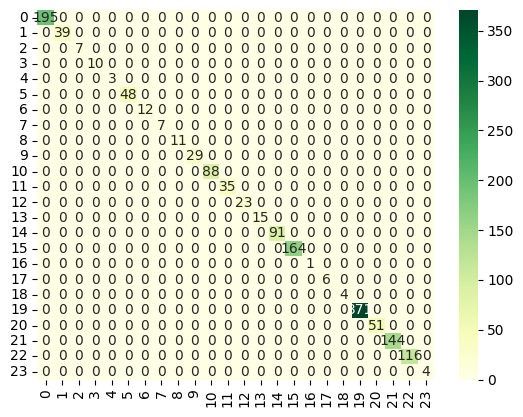

In [96]:
#Ïò§Ï∞® ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_test, pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

Ïù¥Í±∞ Î≠îÍ∞Ä Ï†úÍ∞Ä Îã®Îã®Ìûà ÏûòÎ™ªÌïú Í≤É Í∞ôÏùÄÎç∞ ÌòπÏãú Î≠îÍ∞Ä Ïò§Î•òÏ†ê Î∞úÍ≤¨ÌïòÏãúÎ©¥ Íº≠ ÎßêÏîÄÌï¥Ï£ºÏÑ∏Ïöî... üò¢üò¢üò¢

# Word2Vec Ï†ÅÏö©

In [97]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

#ÌÜ†ÌÅ∞Ìôî
tokenized_reviews = [word_tokenize(review) for review in expanded_df['reviews']]

#Word2Vec
model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

#Î¶¨Î∑∞ Î≤°ÌÑ∞Ìôî
def get_average_vector(review):
    vectors = [model.wv[word] for word in review if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X = np.array([get_average_vector(review) for review in tokenized_reviews])
X_train, X_test, y_train, y_test = train_test_split(X, expanded_df['keyword2'], test_size=0.2, random_state=42)

# RandomForestClassifier Î™®Îç∏ ÌïôÏäµ
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9993215739484396


<Axes: >

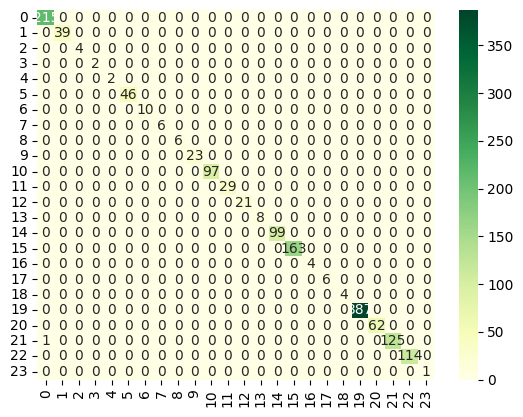

In [98]:
#Ïò§Ï∞® ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

# FastText Ï†ÅÏö©

In [100]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize

#ÌÜ†ÌÅ∞Ìôî
tokenized_reviews = [word_tokenize(review) for review in expanded_df['reviews']]

#FastText Î™®Îç∏
model = FastText(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

#Î¶¨Î∑∞ Î≤°ÌÑ∞Ìôî ÏúÑÏùò Word2VecÍ≥º Í∞ôÏù¥ ÏÇ¨Ïö©
def get_average_vector(review):
    vectors = [model.wv[word] for word in review if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X = np.array([get_average_vector(review) for review in tokenized_reviews])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, expanded_df['keyword2'], test_size=0.2, random_state=42)

# RandomForestClassifier Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('FastText Accuracy:', accuracy_score(y_test, y_pred))


FastText Accuracy: 0.9993215739484396


<Axes: >

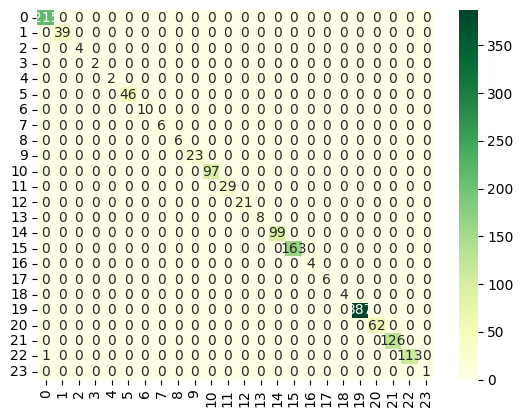

In [101]:
#Ïò§Ï∞® ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm)


sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')